# <center>Literate Programming</center>

The word literate programming was coing by Donald Knuth in 1984. Jupyter notebook is one of the many tools that allows a way programming which Kunth's words is - "our main task is to instruct a computer what to do, let us concentrate rather on explaining to human beings what we want a computer to do".

The first problem that this notebook presents is Babylonian method of computing square root.

### <center>Babylonian method for square root</center>

This is iterative method for computing square root of a positive number. It starts with an initial guess and successively refines it. Iterative formula is:

$$x_{n+1} = \frac{1}{2}(x_n + \frac{n}{x_n})$$

How is this formula derived?

One way of looking at it is:

$$x^2 = n$$

$$x = \frac{n}{x}$$

$$x + x = \frac{n}{x} + x$$

$$2x = (\frac{n}{x} + x)$$

$$x = \frac{1}{2} (\frac{n}{x} + x)$$

Successively we are taking the average of ($x$ and $\frac{n}{x}$)


Some algebraic manipulations to prove the convergence

$$x_{n + 1} = \frac{1}{2}(x_n + \frac{n}{x_n})$$

$$x_{n + 1}^2 - n = \frac{1}{4} (x_n + \frac{n}{x_n})^2 - n$$

$$x_{n + 1}^2 - n = \frac{1}{4} (x_n ^ 2 + \frac{n^2}{x_n^2} + 2n) - n$$

$$x_{n + 1}^2 - n = \frac{x_n ^ 2}{4} + \frac{n^2}{4x_n^2} - \frac{n}{2}$$

$$x_{n + 1}^2 - n = \frac{x_n ^ 4 + n^2 - 2x_n}{4x_n^2}$$

$$x_{n + 1}^2 - n = \frac{(x_n ^ 2 - n) ^ 2}{4x_n^2} \geq 0 $$

Thus all $x_n$ past the first one will satisfy $x_n^2 \geq n$

Now

$$x_{n + 1} = \frac{1}{2}(x_n + \frac{n}{x_n})$$

$$x_{n + 1} - x_n = \frac{1}{2}(x_n + \frac{n}{x_n}) - x_n$$

$$x_{n + 1} - x_n = \frac{n - x_n^2}{2x_n}$$ 

With $x_n^2 \geq n$, $x_{n + 1} - x_n \leq 0$. In other words $x_{n + 1} \leq x_n$

From last but one line we get:

$$x_{n + 1} - x_n = \frac{n - x_n^2}{2x_n}$$

$$n - x_n^2 = 2x_n(x_{n + 1} - x_n)$$

$$\lim_{n\to\infty}(n - x_n^2) = \lim_{n\to\infty}[2x_n(x_{n + 1} - x_n)]$$

With $\lim_{n\to\infty}(x_{n + 1} - x_n) = 0$, $\lim_{n\to\infty}(n - x_n^2) = 0$

$$\lim_{n\to\infty}x_n^2 = n$$

This doesn't tell us anything about rate of convergence. This [document]( http://www.math.harvard.edu/library/sternberg/slides/lec1.pdf) shows exponential rate of convergence. Let us put together few lines of Python to implement Babylonia method.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import math
import re

In [116]:
def babylonia_square_root(n, guess=1, error=0.001):
    if n < 0: 
        raise Exception("The parameter needs to be greater than or equal to zero")
    elif n == 0:
        return 0
    else:
        rel_errors = []
        iteration = 1
        estimate = 0.5 * (1 + float(n) / guess)
        sqrt_value = math.sqrt(n)
        while abs(math.pow(estimate, 2) - n) > error:
            rel_errors.append((sqrt_value - estimate) / sqrt_value)
            guess = estimate
            estimate = 0.5 * (guess + float(n) / guess)
            iteration += 1
        return [(index + 1, y) for index, y in enumerate(rel_errors)]
            


In [117]:
columns = []
for index, i in enumerate(range(10000, 100000, 10000)):
    if index == 0:
        df = pd.DataFrame(babylonia_square_root(i), columns=['Iteration', 'Sqrt_%s' % str(i)])
    else:
        df1 = pd.DataFrame(babylonia_square_root(i), columns=['Iteration', 'Sqrt_%s' % str(i)])
        df = df1.merge(df, left_on='Iteration', right_on='Iteration', how='outer')
    columns.append('Sqrt_%s' % str(i))

In [118]:
def draw_line_graph(df, columns):
    fig, ax = plt.subplots(figsize=(20,10))
    fig.suptitle('Relative error plotted against iteration count', fontsize=20)
    sns.set(style="whitegrid")

    for i in range(0, len(columns)):
        g = sns.lineplot(x="Iteration", y=columns[i], data=df, ax=ax) 
    ax.set_ylabel('relative error', fontsize=14)    
    plt.legend(columns, loc=2);

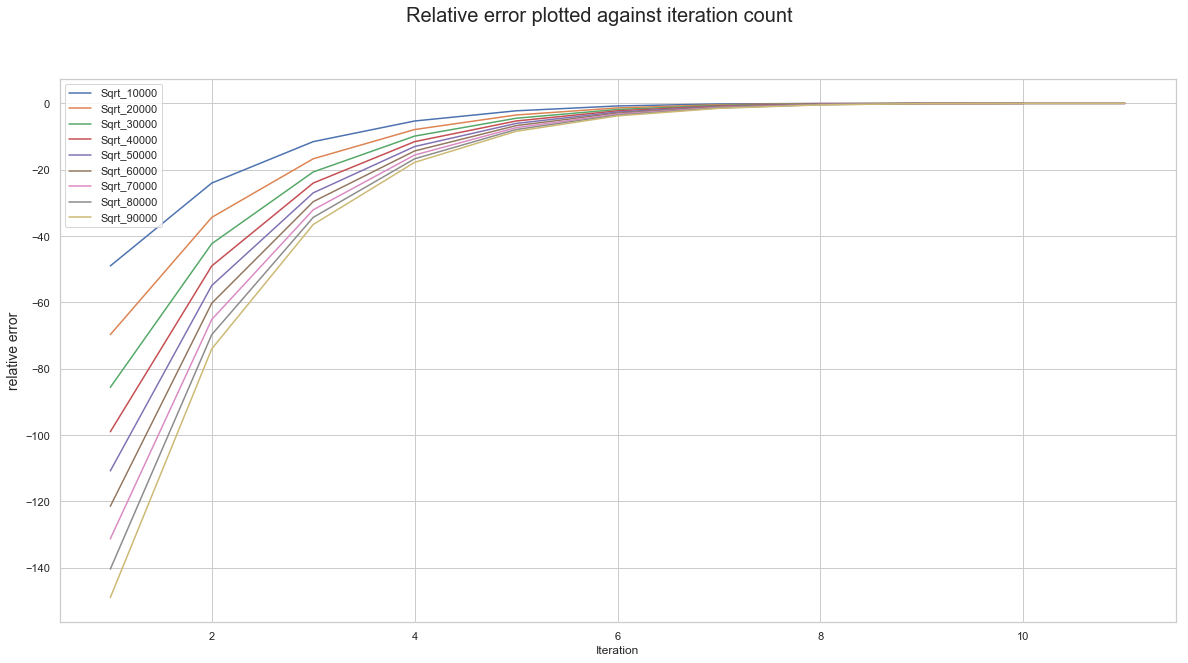

In [119]:
draw_line_graph(df, columns)

In [120]:
columns = []

errors = [1.0/math.pow(10, i) for i in range(1,20)]
for index, e in enumerate(errors):
    if index == 0:
        df = pd.DataFrame(babylonia_square_root(10000, error=e), columns=['Iteration', 'error(%s)' % str(e)])
    else:
        df1 = pd.DataFrame(babylonia_square_root(10000, error=e), columns=['Iteration', 'error(%s)' % str(e)])
        df = df1.merge(df, left_on='Iteration', right_on='Iteration', how='outer')
    columns.append('error(%s)' % str(e))
    

In [121]:
df = pd.DataFrame(df.count())\
.reset_index()\
.rename(columns={'index':'Error', 0:'Iteration Count'})\
.query('Error != "Iteration"')

df['Error'] = df.Error.apply(lambda x: re.search(r'error\((.*?)\)', x).group(1)) 


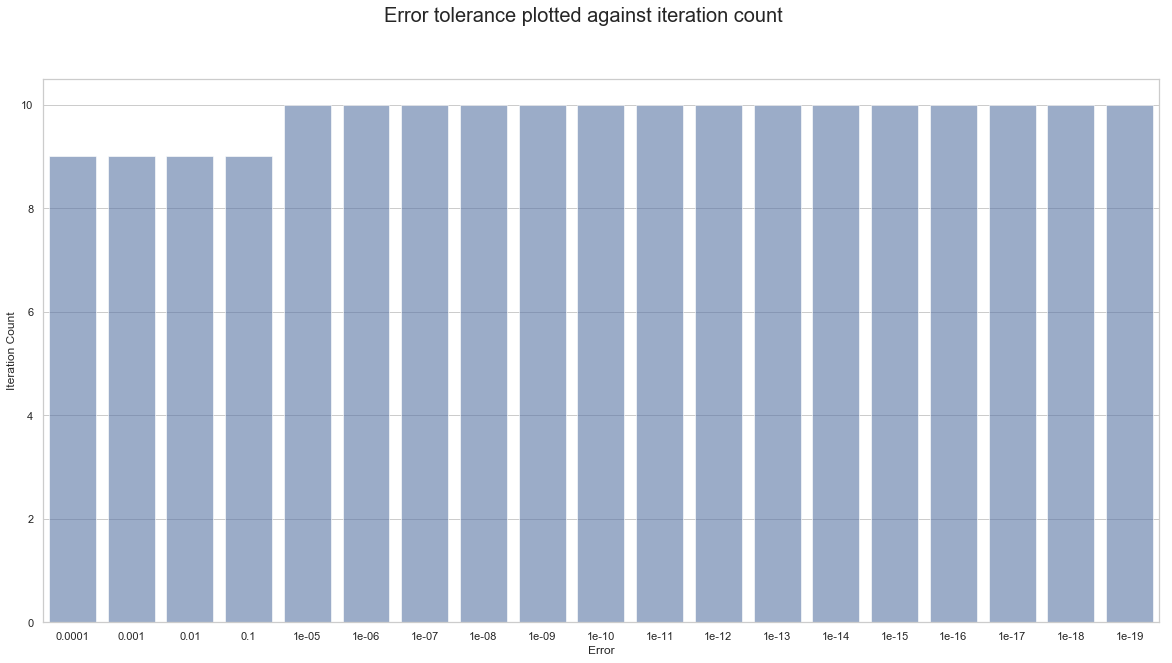

In [122]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Error tolerance plotted against iteration count', fontsize=20)
sns.set(style="whitegrid")
g = sns.catplot(x="Error", y="Iteration Count", data=df, ax=ax, kind="bar", color=sns.color_palette()[0], alpha=0.6)
plt.close(2)

The above plot shows that very few iterations allows us to reach low error tolerance level quickly.